# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [40]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib
import os


In [2]:
# matplotlib version
matplotlib.__version__

'3.5.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r"C:\Users\fardi\OneDrive\Desktop\CF\Data Immersion\A6.Advanced Analytics & Dashboard Design\05-12-2021 Germany Apartment Rental"

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean.csv'))

### 2. Data Cleaning

#### Renaming Columns:

In [6]:
df.shape

(144591, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar',
       'baseRent', 'livingSpace', 'geo_krs', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio3', 'date'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0           int64
serviceCharge      float64
heatingType         object
newlyConst            bool
balcony               bool
totalRent          float64
yearConstructed    float64
hasKitchen            bool
geo_bln             object
cellar                bool
baseRent           float64
livingSpace        float64
geo_krs             object
condition           object
interiorQual        object
petsAllowed         object
street              object
lift                  bool
typeOfFlat          object
noRooms            float64
floor              float64
numberOfFloors     float64
garden                bool
regio3              object
date                 int64
dtype: object

In [9]:
df.head()

,Unnamed: 0,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,...,petsAllowed,street,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio3,date
0,0,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,True,...,no,Sch&uuml;ruferstra&szlig;e,False,ground_floor,4.0,1.0,3.000000,True,SchÃ¼ren,43586
1,2,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,True,...,no,Turnerweg,True,apartment,3.0,3.0,4.000000,False,ÃuÃere_Neustadt_Antonstadt,43739
2,4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,False,...,no,Hermann-Henrich-Meier-Allee,False,apartment,3.0,1.0,3.670219,False,Neu_Schwachhausen,43862
3,8,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_WÃ¼rttemberg,True,...,no,no_information,False,roof_storey,2.0,2.0,2.000000,False,Denzlingen,43862
4,10,88.0,central_heating,False,True,307.0,1930.0,False,Sachsen,True,...,no,Hofer Stra&szlig;e,False,apartment,2.0,3.0,3.670219,False,Sonnenberg,43739


#### Missing Values Check:

In [10]:
# Check for missing values

df.isnull().sum() # No missing values!

Unnamed: 0         0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
geo_bln            0
cellar             0
baseRent           0
livingSpace        0
geo_krs            0
condition          0
interiorQual       0
petsAllowed        0
street             0
lift               0
typeOfFlat         0
noRooms            0
floor              0
numberOfFloors     0
garden             0
regio3             0
date               0
dtype: int64

#### Duplicates Check:

In [11]:
# Find duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups.shape # No duplicatess!

(0, 25)

#### Mixed-Type Data:

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3. Exploring Relationships

### Correlations:

In [14]:
#### Drop column 'Unnamed: 0'
df = df.drop(['Unnamed: 0' ], axis=1)

In [15]:
# Create a correlation matrix using pandas

df.corr()

,serviceCharge,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,lift,noRooms,floor,numberOfFloors,garden,date
serviceCharge,1.000000,0.040153,0.043729,0.151903,0.036009,0.034676,0.016114,0.135281,0.149672,0.058368,0.100223,0.001260,0.001433,0.011517,-0.004239
newlyConst,0.040153,1.000000,0.158775,0.301378,0.440594,0.074841,0.003021,0.302090,0.168971,0.345087,0.073294,-0.046026,-0.002710,0.015704,-0.010569
balcony,0.043729,0.158775,1.000000,0.264801,0.321326,0.075480,0.136059,0.250405,0.258294,0.206359,0.205050,0.017669,0.014873,-0.019809,0.014961
totalRent,0.151903,0.301378,0.264801,1.000000,0.256003,0.302499,0.045975,0.977241,0.758929,0.344414,0.470419,0.024428,0.009299,0.043987,0.000513
yearConstructed,0.036009,0.440594,0.321326,0.256003,1.000000,0.146513,0.025264,0.248590,0.122851,0.380378,0.049638,0.028781,0.007697,-0.075595,0.020200
hasKitchen,0.034676,0.074841,0.075480,0.302499,0.146513,1.000000,0.010660,0.311629,0.114744,0.165269,-0.036875,-0.031721,-0.001319,0.073776,0.012042
cellar,0.016114,0.003021,0.136059,0.045975,0.025264,0.010660,1.000000,0.035738,0.071004,0.034227,0.100021,-0.043769,-0.004048,0.103765,0.008894
baseRent,0.135281,0.302090,0.250405,0.977241,0.248590,0.311629,0.035738,1.000000,0.716714,0.331824,0.430226,0.017539,0.006483,0.045132,0.002264
livingSpace,0.149672,0.168971,0.258294,0.758929,0.122851,0.114744,0.071004,0.716714,1.000000,0.140140,0.762803,-0.019586,-0.027133,0.087720,-0.027625
lift,0.058368,0.345087,0.206359,0.344414,0.380378,0.165269,0.034227,0.331824,0.140140,1.000000,-0.024269,0.210320,0.110977,-0.061204,0.008630


#### Create a correlation heatmap using seaborn:

In [16]:
df.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors',
       'garden', 'regio3', 'date'],
      dtype='object')

In [17]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent','street',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
        'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors',
       'garden', 'regio3', 'totalRent']]

In [18]:
sub

,serviceCharge,heatingType,newlyConst,balcony,yearConstructed,hasKitchen,geo_bln,cellar,baseRent,street,...,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio3,totalRent
0,245.00,central_heating,False,False,1965.0,False,Nordrhein_Westfalen,True,595.00,Sch&uuml;ruferstra&szlig;e,...,normal,no,False,ground_floor,4.0,1.0,3.000000,True,SchÃ¼ren,840.00
1,255.00,floor_heating,True,True,2019.0,False,Sachsen,True,965.00,Turnerweg,...,sophisticated,no,True,apartment,3.0,3.0,4.000000,False,ÃuÃere_Neustadt_Antonstadt,1300.00
2,138.00,self_contained_central_heating,False,True,1950.0,False,Bremen,False,765.00,Hermann-Henrich-Meier-Allee,...,no,no,False,apartment,3.0,1.0,3.670219,False,Neu_Schwachhausen,903.00
3,110.00,oil_heating,False,False,1970.0,True,Baden_WÃ¼rttemberg,True,580.00,no_information,...,sophisticated,no,False,roof_storey,2.0,2.0,2.000000,False,Denzlingen,690.00
4,88.00,central_heating,False,True,1930.0,False,Sachsen,True,219.00,Hofer Stra&szlig;e,...,normal,no,False,apartment,2.0,3.0,3.670219,False,Sonnenberg,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144586,112.13,district_heating,False,True,2016.0,True,Hessen,True,1255.38,Gundelandst.,...,sophisticated,yes,True,apartment,3.0,2.0,4.000000,True,Preungesheim,1479.64
144587,98.00,central_heating,False,True,1994.0,False,Sachsen_Anhalt,True,302.52,Thomas-Mann-Str.,...,no,no,False,apartment,2.5,2.0,3.670219,False,Cracau,424.52
144588,120.00,central_heating,False,True,1930.0,False,Sachsen,True,248.00,Neefestra&szlig;e,...,simple,negotiable,False,apartment,2.0,1.0,4.000000,True,Kappel,368.00
144589,220.00,gas_heating,False,True,1983.0,True,Hessen,False,930.00,no_information,...,sophisticated,negotiable,False,apartment,3.5,1.0,1.000000,False,Viernheim,1150.00


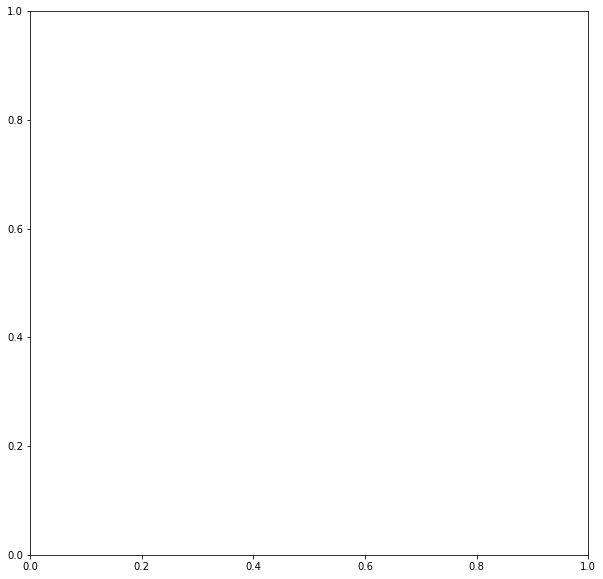

In [19]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [20]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 


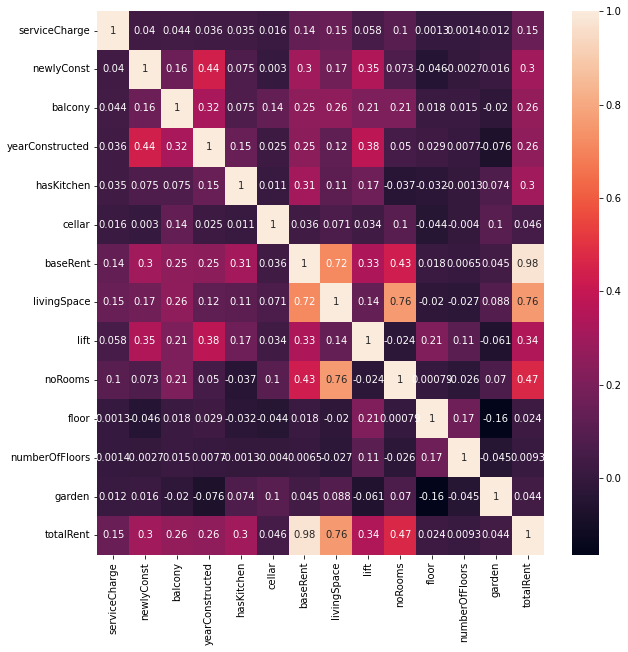

In [21]:
corr.figure

### What interest me is total rent, so I will look at the relationship with regards to 'totalRent'
Surprisingly, there is some kind of relationship with all the variables

- **0: no relationship**
   - There is almost no relationship with `garden`, `numberOfFloors`, `floor` and `cellar`
   - All having corr coeff less than 0.05

- **0.1–0.3: weak relationship**
   - There is weak relationship with `serviceCharge`, `balcony` and `yearConstructed`  

- **0.3–0.5: moderate relationship**
   - There is moderate positive relationship with `newlyConst`, `hasKitchen`, `lift`and `noRooms`
   - This could be interpreted as apartment that are either newly constructed or has a kitchen, or has a lift or a higher number of rooms, are more expensive 


- **0.5–1.0: strong relationship**
   - There is a strong positive relationship with `baseRent` and `livingSpace`
   - Base rent is redundant here as it is almost same as total rent.
   - But `livingSpace` has a strong positive relationship with `totalRent`, which could be interpreted as larger the living space, the higher the total rent.

### Scatterplots:

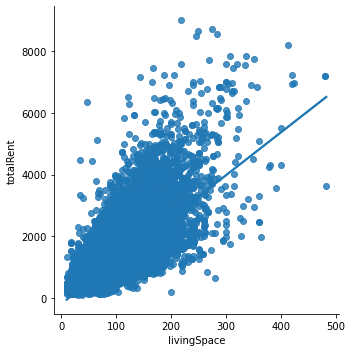

In [22]:
# Create a scatterplot for the "livingSpace" and "baseRent" columns in seaborn

sns.lmplot(x = 'livingSpace', y = 'totalRent', data = df)

######  There is a strong positive relationship, between totalRent and livingSpace, this seems obvious as bigger apartment will lead to higher rent.

### Pair Plots:

In [23]:
# I will consider varible with strong corr coeff
sub_2 = sub[['totalRent', 'livingSpace', 'noRooms']]

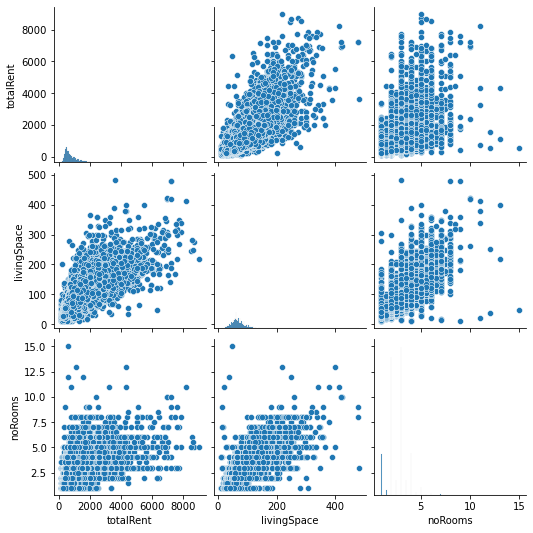

In [24]:
# Create a pair plot 

g = sns.pairplot(sub_2)

- From the scatter plot, we can confirm that their is a positive linear relationship between totalRent and the livingSpace
- Their is also a slighltly positive linear relationship between Number of Room and total rent, but the relationship is weak, as there are many outliers

In [72]:
# Create a subset excluding the "Date" and "No" columns

sub3 = df[['serviceCharge', 'heatingType',
       'yearConstructed', 'geo_bln','street',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed',
           'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors', 'totalRent']]

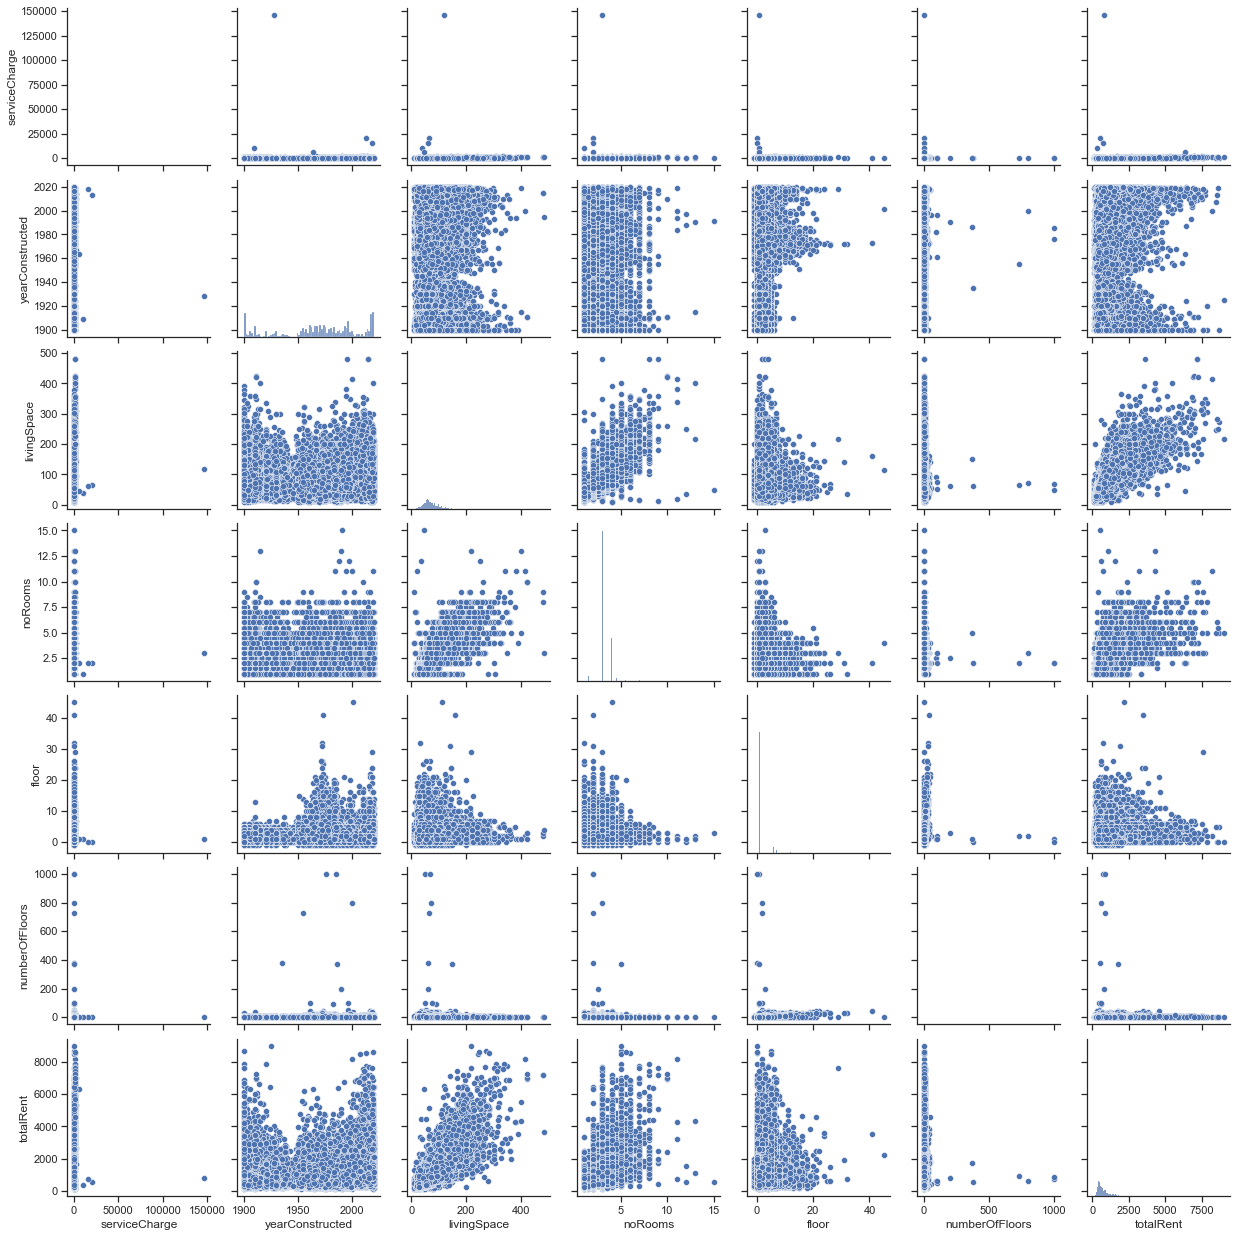

In [73]:
g = sns.pairplot(sub3)

### Categorical Plots:

##### Creating a categorical variable that splits the "totalRent" column into categories

C:\Users\fardi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalRent', ylabel='Density'>

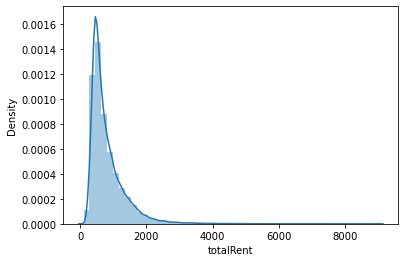

In [25]:
# Use a histogram to visualize the distribution of the variables.
sns.distplot(df['totalRent'], bins = 50)

<AxesSubplot:xlabel='totalRent', ylabel='Count'>

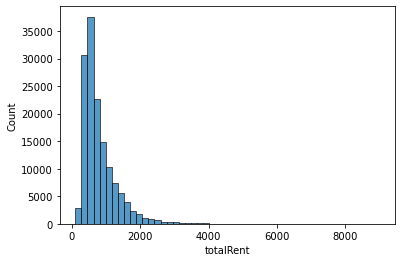

In [26]:
# Use a histogram to visualize the distribution of the variables.
sns.histplot(df['totalRent'], bins = 50)

In [27]:
df['totalRent'].describe()

count    144591.000000
mean        813.018283
std         545.146238
min         100.000000
25%         467.000000
50%         641.870000
75%         986.165000
max        9000.000000
Name: totalRent, dtype: float64

In [28]:
df.loc[df['totalRent'] < 600, 'Price category'] = 'Low price'

In [29]:
df.loc[(df['totalRent'] >= 600) & (df['totalRent'] < 1200), 'Price category'] = 'Middle price'

In [30]:
df.loc[df['totalRent'] >= 1200, 'Price category'] = 'High price'

In [31]:
df['Price category'].value_counts(dropna = False)

Low price       65309
Middle price    55083
High price      24199
Name: Price category, dtype: int64

In [32]:
df.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors',
       'garden', 'regio3', 'date', 'Price category'],
      dtype='object')

<AxesSubplot:xlabel='livingSpace', ylabel='Count'>

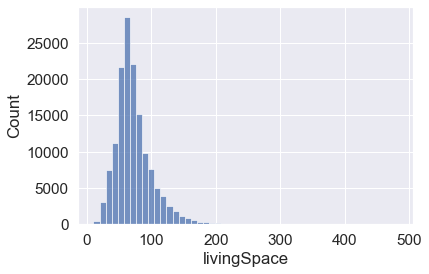

In [54]:
# Use a histogram to visualize the distribution of the variables.
sns.histplot(df['livingSpace'], bins = 50)

In [55]:
df['livingSpace'].describe()

count    144591.000000
mean         72.283730
std          29.722217
min          10.000000
25%          54.500000
50%          66.500000
75%          85.000000
max         482.000000
Name: livingSpace, dtype: float64

In [56]:
df.loc[df['livingSpace'] < 45, 'Space category'] = 'SmallSpace'

In [57]:
df.loc[(df['livingSpace'] >= 45) & (df['livingSpace'] < 90), 'Space category'] = 'MediumSpace'

In [58]:
df.loc[df['livingSpace'] >= 90, 'Space category'] = 'BigSpace'

In [59]:
df['Price category'].value_counts(dropna = False)

Low price       65309
Middle price    55083
High price      24199
Name: Price category, dtype: int64

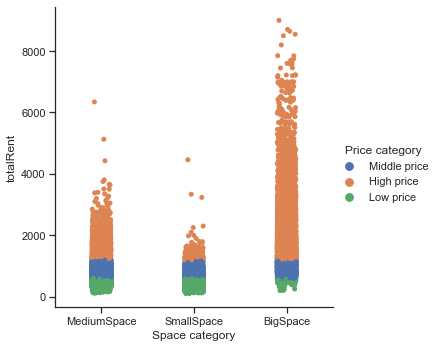

In [60]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Space category", y="totalRent", hue="Price category", data=df)

- Although all the Space Category has high price apartment, BigSpace has the most high price apartment. 

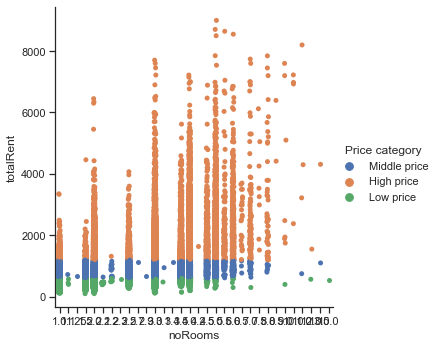

In [61]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="noRooms", y="totalRent", hue="Price category", data=df)

- Here also we see that as the number of room increases there tend to be more High price, compared to other Price category

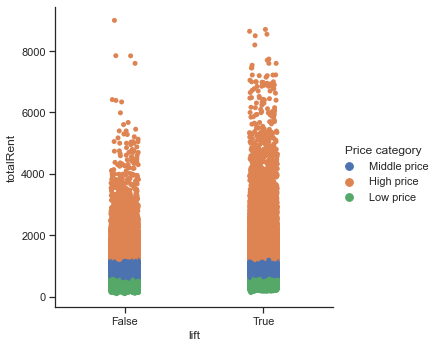

In [62]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="lift", y="totalRent", hue="Price category", data=df)

- Here also we see that an apartment with a lift has more High Price category, but this is not always the case, as without lift also have high price category

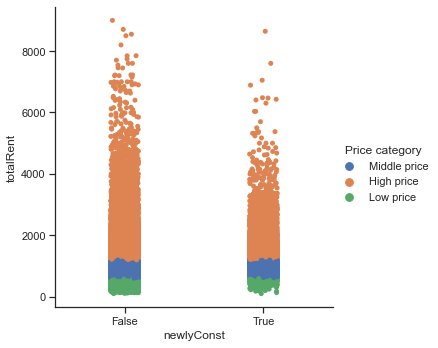

In [64]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="newlyConst", y="totalRent", hue="Price category", data=df)

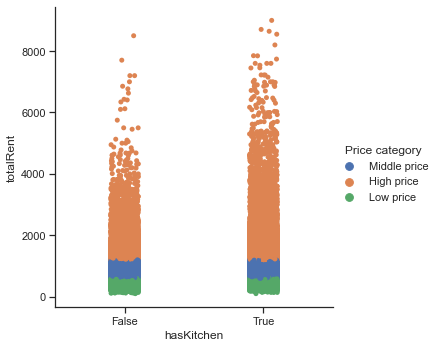

In [65]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="hasKitchen", y="totalRent", hue="Price category", data=df)

- Newly Constructed apartment and having a kitchen, does not have a linear relationship with totalRent

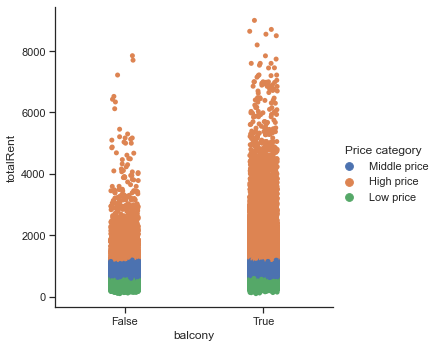

In [75]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="balcony", y="totalRent", hue="Price category", data=df)

- Having a baclony tends to have higher prices, but the relationship is not clear

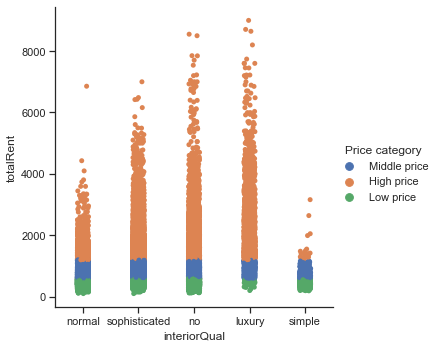

In [76]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="interiorQual", y="totalRent", hue="Price category", data=df)

- Luxury seems to have more high price category
- It could be interpreted that interior Quality does have a relationship with totalRent

#### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far
-	Which city has the cheapest/most expensive rental price for an apartment?
-	What are the factors to consider when renting an apartment?
-	Which cities have the largest number of apartments for rent?
-	What is the optimal price to pay for an apartment in a specific city?


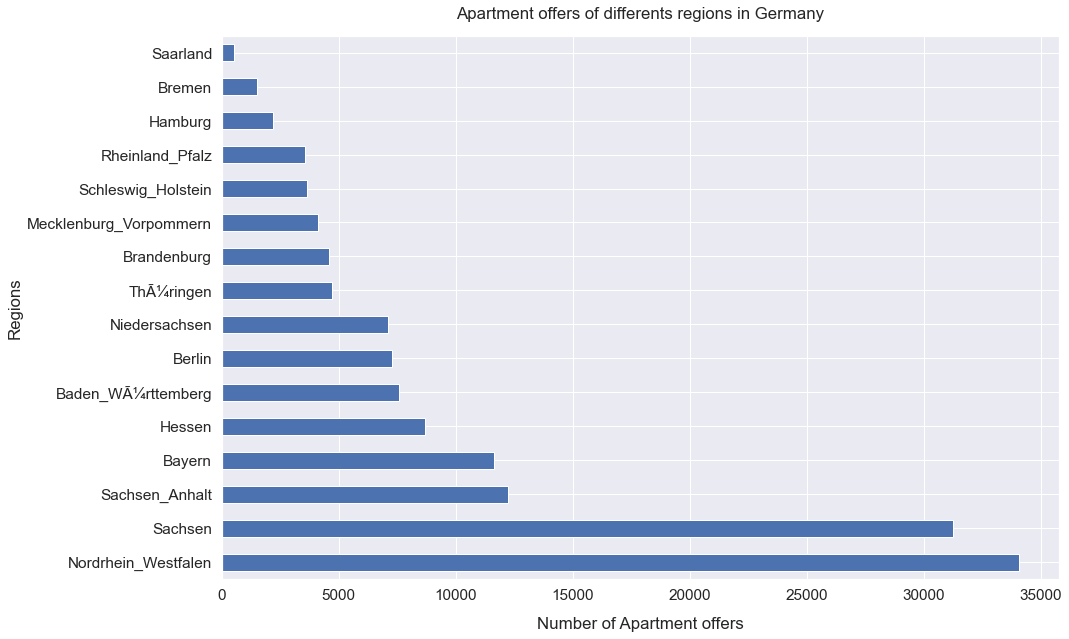

In [34]:
# Which cities have the largest number of apartments for rent?

sns.set(font_scale=1.4)
df['geo_bln'].value_counts().plot(kind='barh', figsize=(15, 10), rot=0)
plt.xlabel("Number of Apartment offers", labelpad=14)
plt.ylabel("Regions", labelpad=5)
plt.title("Apartment offers of differents regions in Germany", y=1.02);

- Nordrhein_Westfalen has the higher number of apartment offers, followed closely by Sachsen.
- Saarland has the lowest number of rental apartment offers

Text(0.5, 1.0, 'Price By State Boxplots')

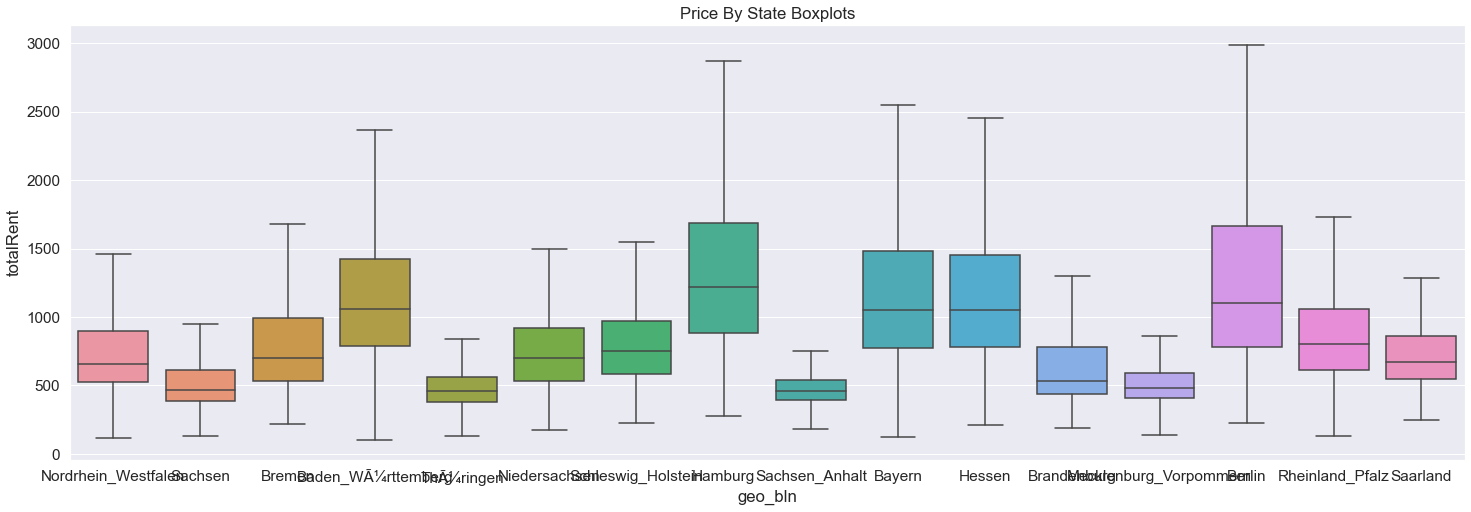

In [53]:

plt.figure(figsize=(25,8))
boxplot_price = sns.boxplot(data=df, x='geo_bln', y='totalRent', showfliers=False)
plt.title('Price By State Boxplots')

- Berlin has the highest totalRent amount, followed by Hamburg and Bayern

In [45]:
plotter = df.groupby('geo_bln')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['geo_bln'] = plotter.index

data = [
    {
        'x': plotter['geo_bln'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['geo_bln'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month", 
                   xaxis=dict(title='District'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

- Hovering over the figure above, give the average rental amount per month for each region , i.e the optimal price to pay per State
- Hamburg has the highest average rental per month €1387
- Sachsen_Anhalt has the lowest average amount rental per month €499

In [46]:
rentmean = df.groupby(['geo_bln'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['geo_bln'].value_counts().sort_index().index,
                   y = rentmean,
                   color= df['geo_bln'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

- Hamburg has the highest average rental per month in Germany
- Sachsen_Anhalt has the lowest average monthly rental in Germany

##### After the analysis, I would like to further investigate a few variables `livingSpace`,  `noRooms`, `hasKitchen`, `interiorQual` and `balcony`. 
##### - Does a mixture/combination of these variables lead to higher totalRent?
